# London Cycle Hire


https://data.london.gov.uk/dataset/number-bicycle-hires

Heathrow monthly weather data https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt


variables
number of bicycle hires
day of the week
time of the year
weather

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
daily = pd.read_csv('data/tfl-daily-cycle-hires-daily.csv', skiprows=1, names=('day','hires'))
monthly = pd.read_csv('data/tfl-daily-cycle-hires-monthly.csv', skiprows=1, names=('month','hires'))

In [3]:
#convert datetimes from strings
daily['datetime'] = pd.to_datetime(daily['day'], format='%d/%m/%Y')
daily['day-of-week'] = daily['datetime'].dt.day_name()

#reindex using datetime
daily = daily.set_index('datetime')

daily.loc['2017-01-01':'2017-12-31']

,day,hires,day-of-week
datetime,,,
2017-01-01,01/01/2017,6534,Sunday
2017-01-02,02/01/2017,11954,Monday
2017-01-03,03/01/2017,19622,Tuesday
2017-01-04,04/01/2017,22122,Wednesday
2017-01-05,05/01/2017,23580,Thursday
2017-01-06,06/01/2017,18973,Friday
2017-01-07,07/01/2017,13879,Saturday
2017-01-08,08/01/2017,13506,Sunday
2017-01-09,09/01/2017,38042,Monday


In [4]:
monthly['datetime'] = pd.to_datetime(monthly['month'], format='%b-%y')
monthly['month-of-year'] = monthly['datetime'].dt.month_name()

#reindex using datetime
monthly = monthly.set_index('datetime')

monthly

,month,hires,month-of-year
datetime,,,
2010-07-01,Jul-10,12461,July
2010-08-01,Aug-10,341203,August
2010-09-01,Sep-10,540859,September
2010-10-01,Oct-10,544412,October
2010-11-01,Nov-10,456304,November
2010-12-01,Dec-10,285574,December
2011-01-01,Jan-11,403178,January
2011-02-01,Feb-11,398292,February
2011-03-01,Mar-11,556155,March


### Seasonal Variations

(array([734138., 734503., 734869., 735234., 735599., 735964., 736330.,
        736695., 737060.]), <a list of 9 Text xticklabel objects>)

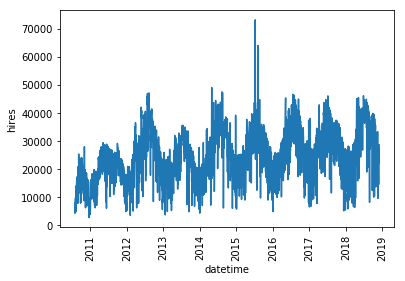

In [5]:
sns.lineplot(x=daily.index, y='hires', data=daily)
plt.xticks(rotation=90)

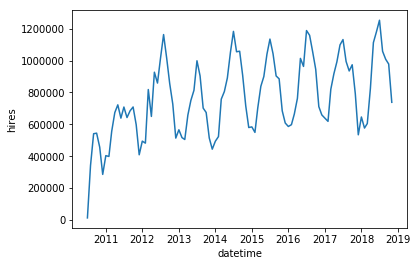

In [6]:
sns.lineplot(x=monthly.index, y='hires', data=monthly)

In [7]:
#data seems to have settled to an annual trend so lets extract most recent year

daily_2017 = daily.loc['2017-01-01':'2017-12-31']
monthly_2017 = monthly.loc['2017-01-01':'2017-12-31']
monthly_2017

,month,hires,month-of-year
datetime,,,
2017-01-01,Jan-17,638491,January
2017-02-01,Feb-17,618550,February
2017-03-01,Mar-17,819752,March
2017-04-01,Apr-17,917716,April
2017-05-01,May-17,992601,May
2017-06-01,Jun-17,1098294,June
2017-07-01,Jul-17,1131838,July
2017-08-01,Aug-17,994199,August
2017-09-01,Sep-17,934751,September


(array([736330., 736389., 736450., 736511., 736573., 736634., 736695.]),
 <a list of 7 Text xticklabel objects>)

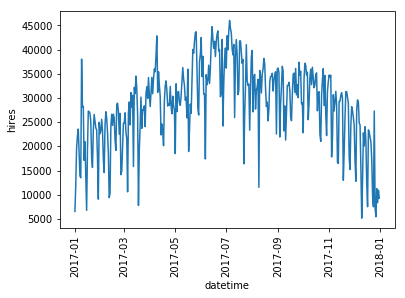

In [8]:
sns.lineplot(x=daily_2017.index, y='hires', data=daily_2017)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

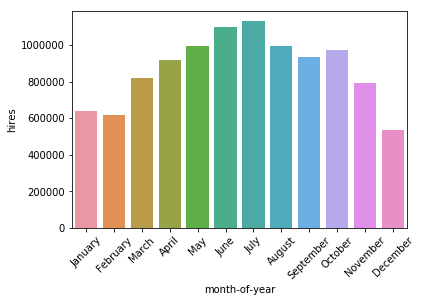

In [9]:
g = sns.barplot(x='month-of-year', y='hires', data = monthly_2017)
plt.xticks(rotation=45)

### Weekly Variations

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

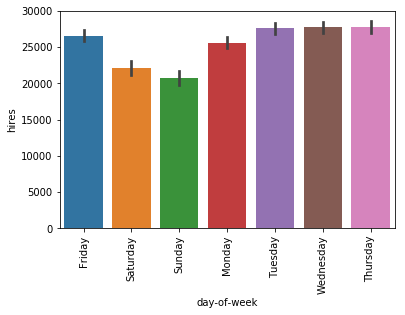

In [10]:
sns.barplot(x='day-of-week', y='hires', data =daily)
plt.xticks(rotation=90)

### Weather Data

In [11]:
weather = pd.read_csv('data/weather.txt', skiprows=757,delim_whitespace=True, skipfooter=10, names=('year','month','temp_max','temp_min','af','rain','sun'), engine='python',dtype={'year':str,'month':str})
#convert month into year-month datetime format
weather["datetime"] = pd.to_datetime((weather["year"].map(str) + "-" + weather["month"]))
weather = weather.set_index('datetime')
weather

,year,month,temp_max,temp_min,af,rain,sun
datetime,,,,,,,
2010-07-01,2010,7,25.0,15.1,0,18.0,161.8#
2010-08-01,2010,8,21.6,13.2,0,88.6,110.9#
2010-09-01,2010,9,19.4,11.2,0,38.2,128.7#
2010-10-01,2010,10,15.2,8.3,1,74.8,104.0#
2010-11-01,2010,11,9.1,4.0,7,32.2,50.0#
2010-12-01,2010,12,3.9,-1.5,21,21.4,18.5#
2011-01-01,2011,1,7.4,2.8,8,76.8,35.6#
2011-02-01,2011,2,10.2,4.8,1,42.8,36.2#
2011-03-01,2011,3,12.3,3.8,4,14.6,126.4#


In [12]:
monthly = pd.merge(left=monthly,right=weather,left_index=True,right_index=True)
monthly_2017 = monthly.loc['2017-01-01':'2017-12-31']

In [15]:
monthly_2017

,month_x,hires,month-of-year,year,month_y,temp_max,temp_min,af,rain,sun
datetime,,,,,,,,,,
2017-01-01,Jan-17,638491,January,2017,1,7.6,0.7,15,60.2,64.5#
2017-02-01,Feb-17,618550,February,2017,2,10.0,4.4,1,38.2,47.8#
2017-03-01,Mar-17,819752,March,2017,3,14.1,6.6,0,25.8,116.3#
2017-04-01,Apr-17,917716,April,2017,4,15.8,5.9,0,4.6,186.2#
2017-05-01,May-17,992601,May,2017,5,19.8,10.4,0,64.8,164.8#
2017-06-01,Jun-17,1098294,June,2017,6,24.0,13.9,0,46.4,204.3#
2017-07-01,Jul-17,1131838,July,2017,7,23.8,14.9,0,90.0,178.0#
2017-08-01,Aug-17,994199,August,2017,8,22.0,13.5,0,58.6,174.9#
2017-09-01,Sep-17,934751,September,2017,9,19.2,11.0,0,59.0,120.1#


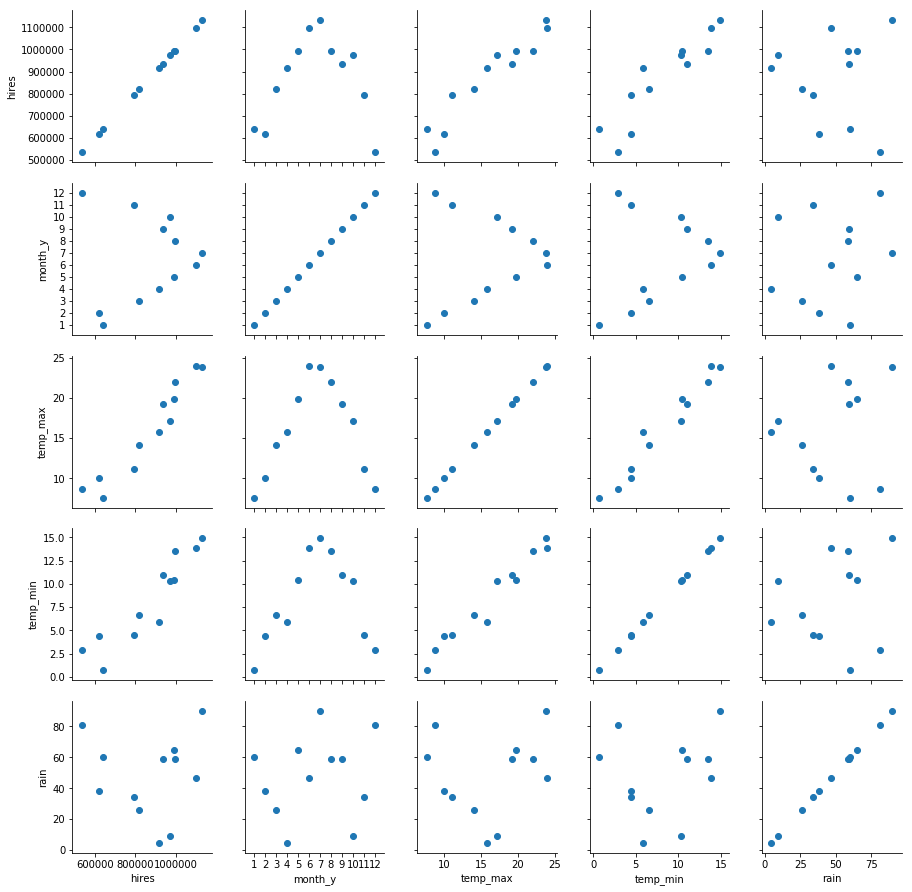

In [14]:
g = sns.PairGrid(monthly_2017.iloc[:,[1,4,5,6,8]])
g.map(plt.scatter);